<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.587022,-0.543332,32.043690,32.675888,-0.632198
1,0.0,1.0,76.858539,0.175208,87.033747,86.559546,0.474201
2,0.0,2.0,71.609101,0.229971,81.839073,81.347624,0.491449
3,0.0,3.0,67.570575,-0.638821,76.931753,77.337959,-0.406206
4,0.0,4.0,21.065754,-0.031064,31.034690,31.165492,-0.130801
...,...,...,...,...,...,...,...
19995,999.0,15.0,53.340233,-0.190110,63.150123,63.329197,-0.179074
19996,999.0,16.0,68.319311,-0.037548,78.281762,78.347332,-0.065569
19997,999.0,17.0,56.300613,0.528490,66.829103,66.297297,0.531807
19998,999.0,18.0,26.971389,-0.088632,36.882757,36.891599,-0.008842


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.587022,-0.543332,32.043690,32.675888,-0.632198
1,0.0,1.0,76.858539,0.175208,87.033747,86.559546,0.474201
2,0.0,2.0,71.609101,0.229971,81.839073,81.347624,0.491449
3,0.0,3.0,67.570575,-0.638821,76.931753,77.337959,-0.406206
4,0.0,4.0,21.065754,-0.031064,31.034690,31.165492,-0.130801
...,...,...,...,...,...,...,...
19995,999.0,15.0,53.340233,-0.190110,63.150123,63.329197,-0.179074
19996,999.0,16.0,68.319311,-0.037548,78.281762,78.347332,-0.065569
19997,999.0,17.0,56.300613,0.528490,66.829103,66.297297,0.531807
19998,999.0,18.0,26.971389,-0.088632,36.882757,36.891599,-0.008842


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    22.587022 -0.543332  32.043690  32.675888 -0.632198
      1.0    76.858539  0.175208  87.033747  86.559546  0.474201
      2.0    71.609101  0.229971  81.839073  81.347624  0.491449
      3.0    67.570575 -0.638821  76.931753  77.337959 -0.406206
      4.0    21.065754 -0.031064  31.034690  31.165492 -0.130801
...                ...       ...        ...        ...       ...
999.0 15.0   53.340233 -0.190110  63.150123  63.329197 -0.179074
      16.0   68.319311 -0.037548  78.281762  78.347332 -0.065569
      17.0   56.300613  0.528490  66.829103  66.297297  0.531807
      18.0   26.971389 -0.088632  36.882757  36.891599 -0.008842
      19.0   63.589106  0.419893  74.008998  73.604793  0.404205

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    22.587022 -0.543332  32.043690  32.675888 -0.632198
      1.0    76.858539  0.175208  87.033747  86.559546  0.474201
      2.0    71.609101  0.229971  81.839073  81.347624  0.491449
      3.0    67.570575 -0.638821  76.931753  77.337959 -0.406206
      4.0    21.065754 -0.031064  31.034690  31.165492 -0.130801
...                ...       ...        ...        ...       ...
999.0 15.0   53.340233 -0.190110  63.150123  63.329197 -0.179074
      16.0   68.319311 -0.037548  78.281762  78.347332 -0.065569
      17.0   56.300613  0.528490  66.829103  66.297297  0.531807
      18.0   26.971389 -0.088632  36.882757  36.891599 -0.008842
      19.0   63.589106  0.419893  74.008998  73.604793  0.404205

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.587022,-0.543332,32.043690,32.675888,-0.632198
1,0.0,1.0,76.858539,0.175208,87.033747,86.559546,0.474201
2,0.0,2.0,71.609101,0.229971,81.839073,81.347624,0.491449
3,0.0,3.0,67.570575,-0.638821,76.931753,77.337959,-0.406206
4,0.0,4.0,21.065754,-0.031064,31.034690,31.165492,-0.130801
...,...,...,...,...,...,...,...
19995,999.0,15.0,53.340233,-0.190110,63.150123,63.329197,-0.179074
19996,999.0,16.0,68.319311,-0.037548,78.281762,78.347332,-0.065569
19997,999.0,17.0,56.300613,0.528490,66.829103,66.297297,0.531807
19998,999.0,18.0,26.971389,-0.088632,36.882757,36.891599,-0.008842


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    22.587022 -0.543332  32.043690  32.675888 -0.632198
      1.0    76.858539  0.175208  87.033747  86.559546  0.474201
      2.0    71.609101  0.229971  81.839073  81.347624  0.491449
      3.0    67.570575 -0.638821  76.931753  77.337959 -0.406206
      4.0    21.065754 -0.031064  31.034690  31.165492 -0.130801
...                ...       ...        ...        ...       ...
999.0 15.0   53.340233 -0.190110  63.150123  63.329197 -0.179074
      16.0   68.319311 -0.037548  78.281762  78.347332 -0.065569
      17.0   56.300613  0.528490  66.829103  66.297297  0.531807
      18.0   26.971389 -0.088632  36.882757  36.891599 -0.008842
      19.0   63.589106  0.419893  74.008998  73.604793  0.404205

[20000 rows x 5 columns]

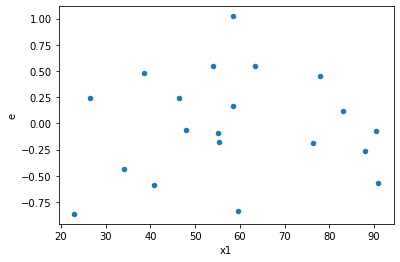

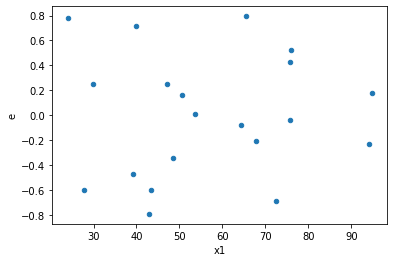

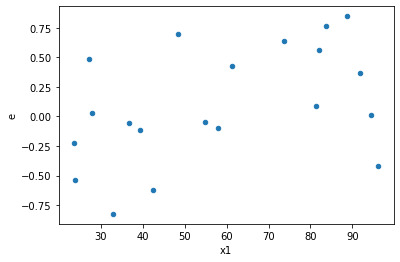

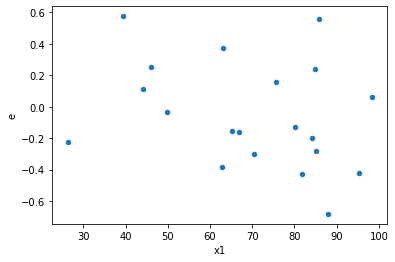

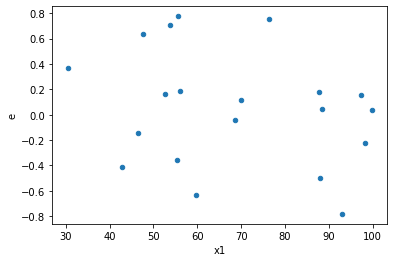

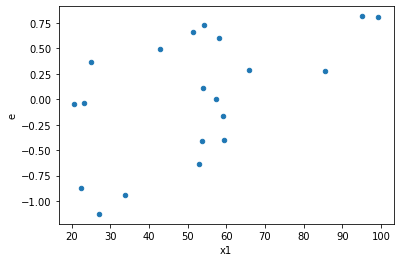

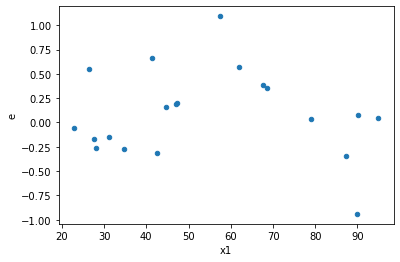

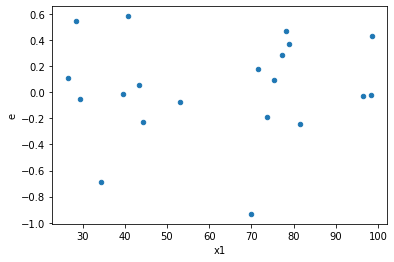

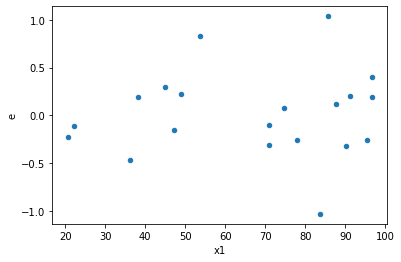

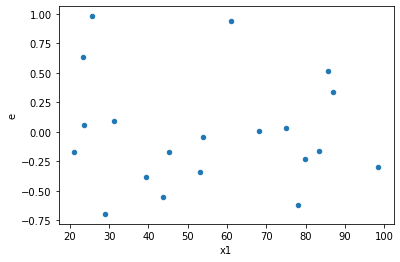

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,7.0,7.0,0.5208402233979382,0.9147466332101839,0.07440574619970546,0.1306780904585977,1.7562903019325544,0.474916203275521,0.7625418983622395,0.2374581016377605,Reject005=1 : Homoscedasticity
10.0,7.0,7.0,1.3550634829054602,1.5564571412886046,0.1935804975579229,0.22235102018408637,1.148623043070518,0.8596460394959609,0.5701769802520196,0.42982301974798043,Reject005=1 : Homoscedasticity
13.0,7.0,7.0,0.7222617293606459,1.1457297175228394,0.10318024705152085,0.1636756739318342,1.5863082189569313,0.5575003215888148,0.7212498392055926,0.2787501607944074,Reject005=1 : Homoscedasticity
18.0,7.0,7.0,0.6674018066538239,2.471993707389886,0.09534311523626056,0.35314195819855515,3.7039062267209144,0.10543142388509197,0.947284288057454,0.052715711942545984,Reject005=1 : Homoscedasticity
20.0,7.0,7.0,0.6138479726268067,1.0084975021414162,0.08769256751811524,0.14407107173448802,1.6429108624824593,0.5282287979424369,0.7358856010287815,0.26411439897121847,Reject005=1 : Homoscedasticity
23.0,7.0,7.0,1.1960884666555778,1.5716323277094242,0.17086978095079683,0.22451890395848917,1.3139766593552373,0.7277865176196652,0.6361067411901674,0.3638932588098326,Reject005=1 : Homoscedasticity
25.0,7.0,7.0,1.3748271043244116,2.6086152971084013,0.19640387204634452,0.3726593281583431,1.897413346669705,0.4173148347457918,0.7913425826271041,0.2086574173728959,Reject005=1 : Homoscedasticity
26.0,7.0,7.0,0.944442862890708,1.791924568879129,0.13492040898438687,0.25598922412558983,1.8973350737115922,0.4173443585403611,0.7913278207298194,0.20867217927018056,Reject005=1 : Homoscedasticity
30.0,7.0,7.0,0.9879681916770864,1.8611929971831593,0.14113831309672661,0.2658847138833085,1.8838592303500832,0.4224653607183906,0.7887673196408047,0.2112326803591953,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,1.3764932915998722,1.071564281406613,0.19664189879998176,0.15308061162951617,0.7784740310366164,0.7495072579454798,Reject005=1 : Homoscedasticity
1.0,7.0,7.0,3.0331353215564985,1.1770553587218608,0.43330504593664265,0.16815076553169442,0.38806556052957025,0.23493474725175506,Reject005=1 : Homoscedasticity
2.0,7.0,7.0,1.1707910476277652,0.4564076872111643,0.1672558639468236,0.06520109817302347,0.38982847377927,0.23710928402896175,Reject005=1 : Homoscedasticity
3.0,7.0,7.0,2.047338797652349,0.6077200374281327,0.2924769710931927,0.08681714820401897,0.296834133229437,0.13151778012599868,Reject005=1 : Homoscedasticity
4.0,7.0,7.0,0.8817988937479697,0.05246683157065326,0.12597127053542426,0.007495261652950466,0.059499770234060875,0.0013985900471470357,Reject005=0 : Heteroscedasticity
5.0,7.0,7.0,1.5302271789302893,0.49163142523914816,0.21860388270432704,0.07023306074844973,0.32128002430516545,0.15720073882924748,Reject005=1 : Homoscedasticity
6.0,7.0,7.0,0.5208402233979382,0.9147466332101839,0.07440574619970546,0.1306780904585977,1.7562903019325544,0.474916203275521,Reject005=1 : Homoscedasticity
7.0,7.0,7.0,0.8639222187857003,0.5883882988273424,0.12341745982652862,0.08405547126104893,0.6810662881831666,0.6249094155124386,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,0.9065561501782607,0.555663684521771,0.12950802145403725,0.07938052636025299,0.6129390710244565,0.5339886630660106,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      911
Reject005=0 : Heteroscedasticity     89
Name: Result_test, dtype: int64